In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('..\\datasets\\df_all.csv', engine='pyarrow')

In [3]:
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [4]:
df.head()

,,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,dropoff_datetime,pickup_datetime
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,2022-01-01 00:53:29,2022-01-01 00:35:40
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,2022-01-01 00:42:07,2022-01-01 00:33:43
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,2022-01-01 01:02:19,2022-01-01 00:53:21
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,2022-01-01 00:35:23,2022-01-01 00:25:21
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,2022-01-01 01:14:20,2022-01-01 00:36:48


In [5]:
df['passenger_count'].value_counts().sort_index()

passenger_count
0.0      52061
1.0    1794055
2.0     343026
3.0      84570
4.0      35321
5.0      51338
6.0      32037
7.0          9
8.0          8
9.0          3
Name: count, dtype: int64

In [6]:
df['duration'] = df['dropoff_datetime'] - df['pickup_datetime']

In [7]:
sum(df['duration'] > '1 days')

14

In [8]:
df['duration'].max()

Timedelta('5 days 21:53:11')

In [9]:
df[df['dropoff_datetime'] < '2010']['dropoff_datetime'].sort_values()

49805     2008-12-31 23:06:56
1286163   2008-12-31 23:15:42
1653802   2009-01-01 00:08:50
264703    2009-01-01 00:46:15
1197307   2009-01-01 06:07:27
1336070   2009-01-01 07:09:58
907016    2009-01-01 10:01:28
1286164   2009-01-01 15:10:10
453025    2009-01-01 17:04:36
907017    2009-01-01 17:55:37
617915    2009-01-01 19:57:57
1237841   2009-01-01 20:33:26
619539    2009-01-01 20:34:42
264704    2009-01-02 00:46:15
Name: dropoff_datetime, dtype: datetime64[ns]

<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

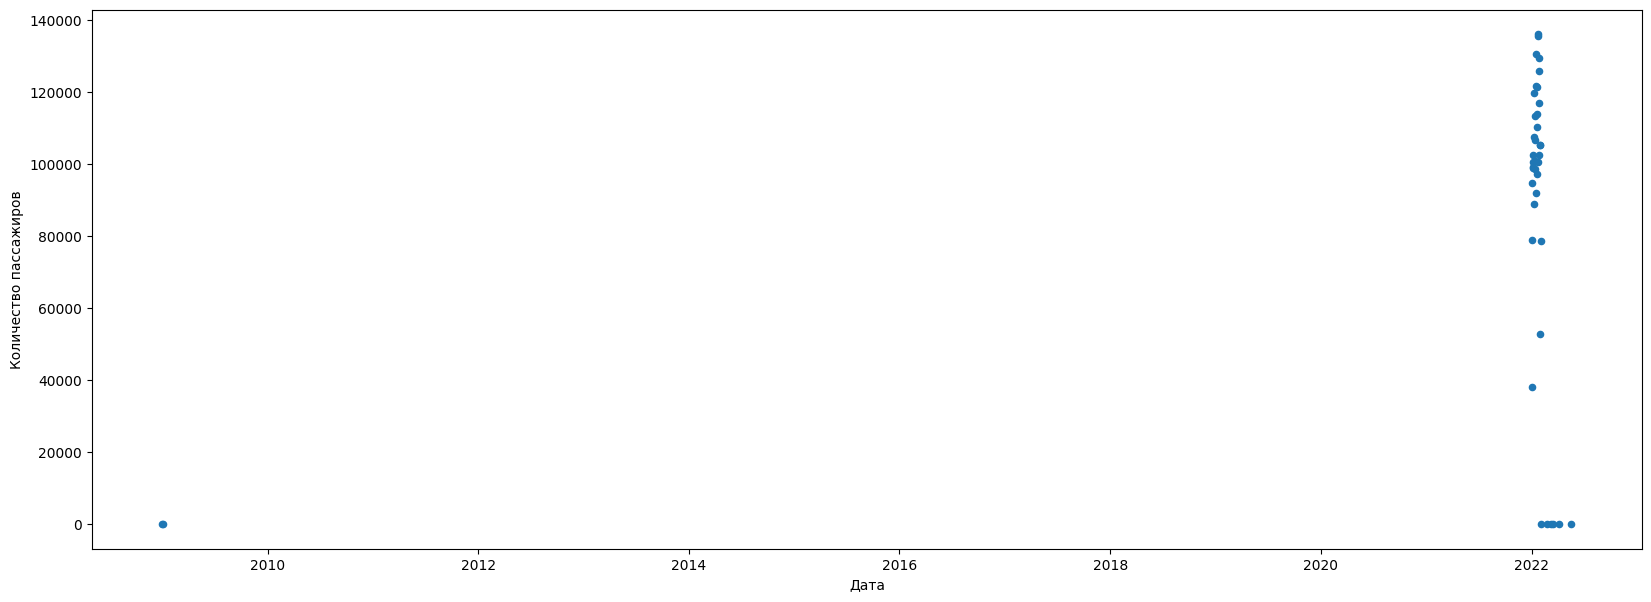

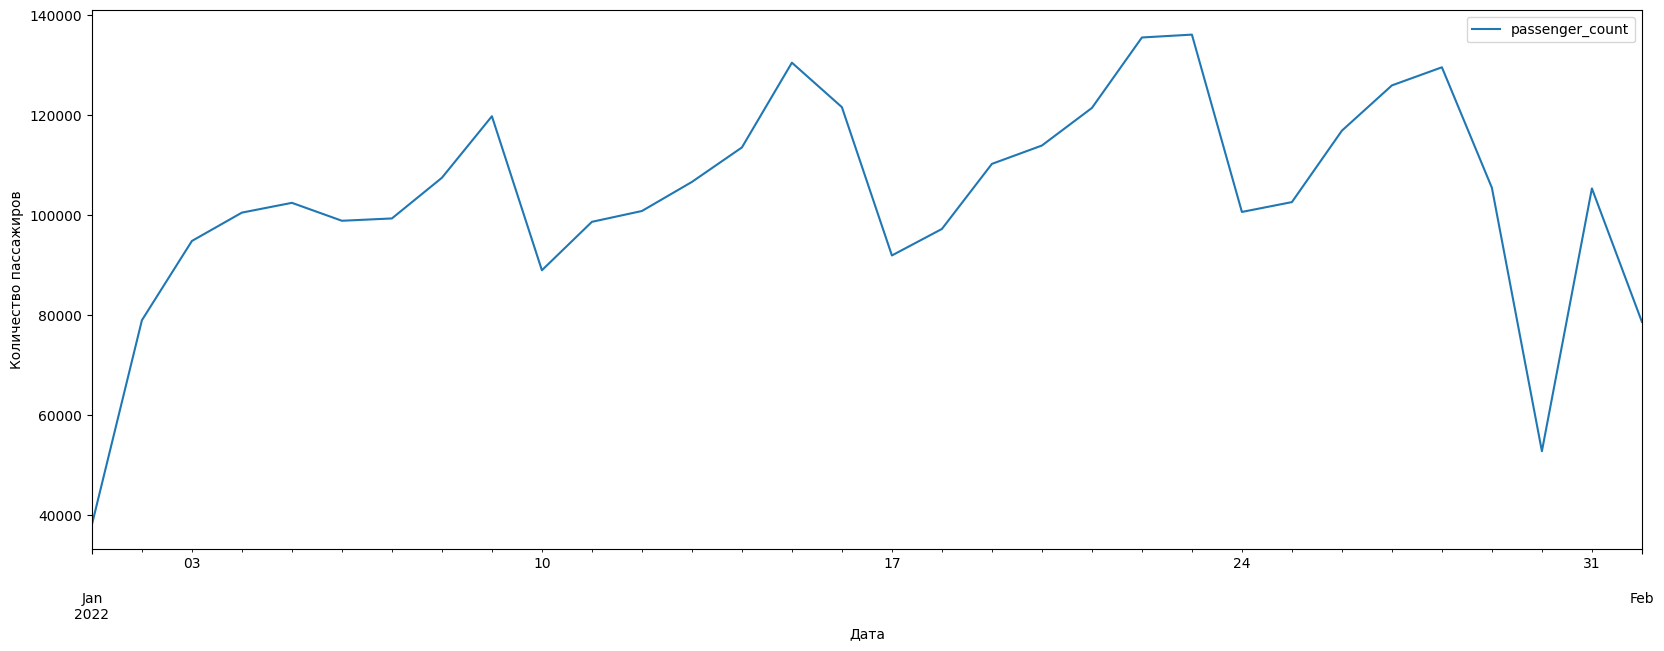

In [10]:
df_dates = df[["dropoff_datetime", "passenger_count"]].copy()
df_dates["dropoff_datetime"] = df_dates["dropoff_datetime"].dt.round('D')
df_dates = df_dates.groupby(by="dropoff_datetime").sum().reset_index()

df_dates.plot.scatter(x="dropoff_datetime", y="passenger_count", figsize=(20, 7), xlabel='Дата', ylabel='Количество пассажиров')

df_dates = df_dates[(df_dates['dropoff_datetime'] > '2010') & (df_dates['dropoff_datetime'] < '2022-02-2')]

df_dates.plot(x="dropoff_datetime", y="passenger_count", figsize=(20, 7), xlabel='Дата', ylabel='Количество пассажиров')

<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

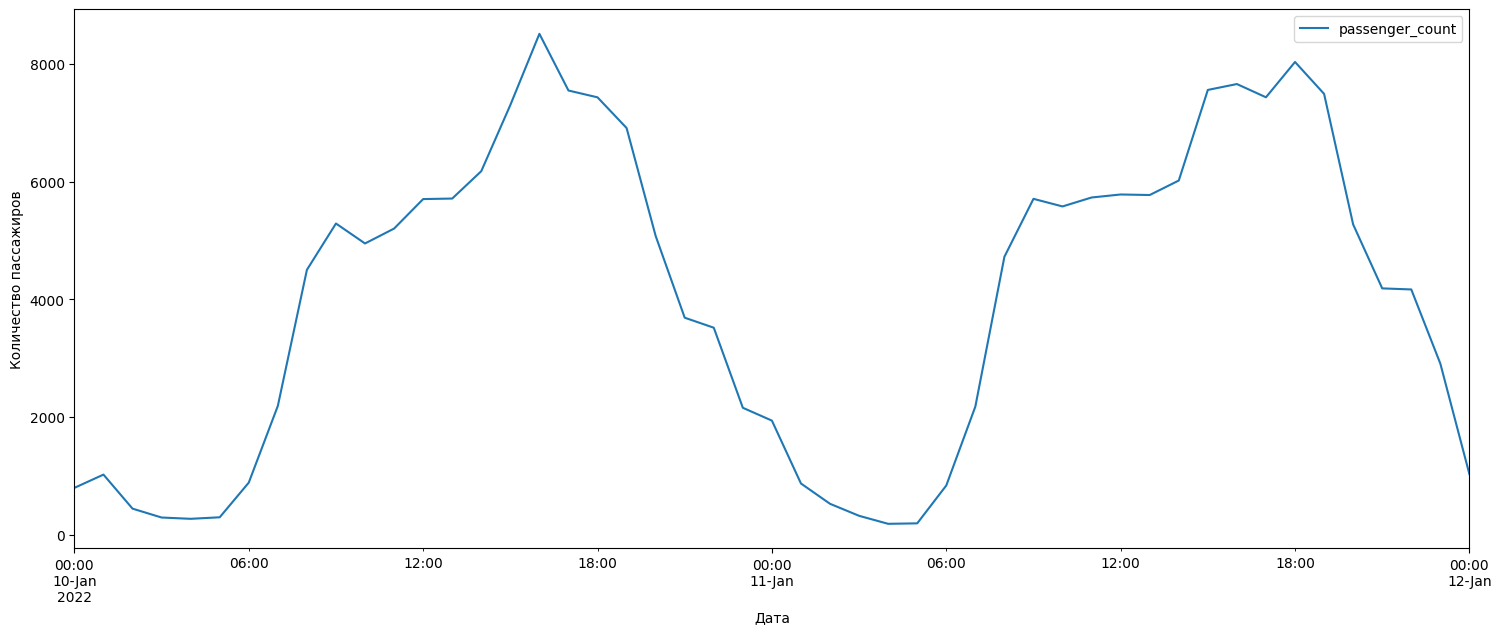

In [11]:
df_hour = df[["dropoff_datetime", "passenger_count"]][(df['dropoff_datetime'] < '2022-01-12') & (df['dropoff_datetime'] > '2022-01-10')]
df_hour["dropoff_datetime"] = df_hour["dropoff_datetime"].dt.round('H')
df_hour.groupby(by="dropoff_datetime").sum().reset_index().plot(x="dropoff_datetime", y="passenger_count", figsize=(18, 7), xlabel='Дата', ylabel='Количество пассажиров')